In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [22]:
transform = transforms.ToTensor()

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

data_loader = torch.utils.data.DataLoader(dataset=mnist_data,
                                          batch_size=64,
                                          shuffle=True)



In [23]:
dataiter = iter(data_loader)
images, labels = next(dataiter)
print(torch.min(images), torch.max(images))

tensor(-1.) tensor(1.)


In [24]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()        # N, 28 * 28
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),# input, ouput, kernel, ..
            nn.ReLU(),
            nn.Conv2d(16, 32, 3,stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7, stride=2, padding=1),
        )
        # output size formula [input size + 2 x padding - kernel size / stride] + 1
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64,32,7, stride=2, padding=1), 
            nn.ReLU(),
            nn.ConvTranspose2d(32,16,3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16,1,3, stride=2, padding=1, output_padding=1),
        )
    def forward(self, x):
        encoded = self.encoder(x)
        deocded = self.decoder(encoded)
        return deocded
    
    

In [25]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [26]:
num_epochs = 10
outputs = []

for epoch in range(num_epochs):
    for (img,_) in data_loader:
        recon = model(img)
        loss = criterion(recon, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'epoch:{epoch+1}, loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))

epoch:1, loss:0.0261
epoch:2, loss:0.0157
epoch:3, loss:0.0117
epoch:4, loss:0.0100
epoch:5, loss:0.0079
epoch:6, loss:0.0074
epoch:7, loss:0.0068
epoch:8, loss:0.0059
epoch:9, loss:0.0058
epoch:10, loss:0.0049


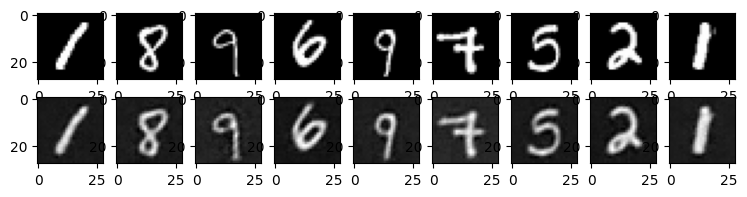

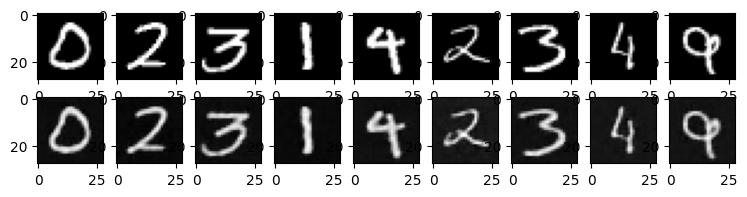

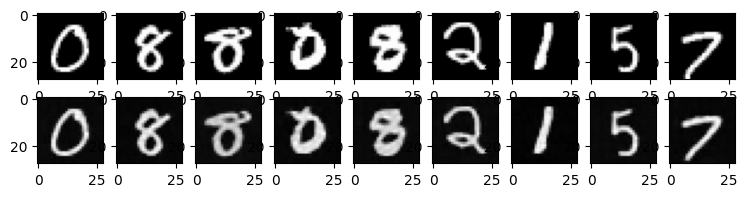

In [27]:
for k in range(0,num_epochs,4):
    plt.figure(figsize=(9,2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()

    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2,9,i+1)
        plt.imshow(item[0])

    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2,9,9+i+1)
        plt.imshow(item[0])

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Set the model to evaluation mode
model.eval()

with torch.no_grad():
    # Get a batch of images and their labels (you already have images and labels from data_loader)
    # Extract the latent representation using the encoder part of your autoencoder.
    latent = model.encoder(images)  # e.g. shape [batch, 64, 2, 2]
    # Flatten the latent representation for each sample
    latent = latent.view(latent.size(0), -1)  # now shape is [batch, 256]
    latent_np = latent.cpu().numpy()

# Reduce the dimensionality to 2 dimensions using PCA
pca = PCA(n_components=2)
latent_pca = pca.fit_transform(latent_np)

# Plot the 2D latent space. Optionally, you can color by the corresponding labels.
plt.figure(figsize=(8, 6))
plt.scatter(latent_pca[:, 0], latent_pca[:, 1], c=labels.numpy(), cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Latent Space Visualization via PCA')
plt.colorbar(label='Digit Label')
plt.show()


ModuleNotFoundError: No module named 'sklearn'

: 